In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("2013_general_payments.csv", dtype={'Physician_Profile_ID': 'S'} )

/Users/epetenko/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,24,25,52,53,55,56,57,58,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index([u'Unnamed: 0', u'Change_Type', u'Covered_Recipient_Type',
       u'Teaching_Hospital_CCN', u'Teaching_Hospital_ID',
       u'Teaching_Hospital_Name', u'Physician_Profile_ID',
       u'Physician_First_Name', u'Physician_Middle_Name',
       u'Physician_Last_Name', u'Physician_Name_Suffix',
       u'Recipient_Primary_Business_Street_Address_Line1',
       u'Recipient_Primary_Business_Street_Address_Line2', u'Recipient_City',
       u'Recipient_State', u'Recipient_Zip_Code', u'Recipient_Country',
       u'Recipient_Province', u'Recipient_Postal_Code',
       u'Physician_Primary_Type', u'Physician_Specialty',
       u'Physician_License_State_code1', u'Physician_License_State_code2',
       u'Physician_License_State_code3', u'Physician_License_State_code4',
       u'Physician_License_State_code5',
       u'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       u'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       u'Applicable_Manufacturer_or_Applicable_GP

In [4]:
df['Total_Amount_of_Payment_USDollars'] = df['Total_Amount_of_Payment_USDollars'].astype(float)

In [5]:
matalon = df[df['Physician_Last_Name'] == "MATALON"]

In [6]:
matalon['Total_Amount_of_Payment_USDollars'].sum()

1316.0000000000002

In [9]:
matalon.to_csv("2013data/matalon.csv")

In [8]:
matalon.pivot_table(index='Name_of_Associated_Covered_Drug_or_Biological1', values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False)

Name_of_Associated_Covered_Drug_or_Biological1
Nesina                                       314.27
LYRICA                                       125.00
Invokana                                     115.15
Creon                                        113.48
DUEXIS-800mg Ibuprofen- 26.6mg Famotidine    107.17
BREO                                         104.74
Qsymia                                        98.61
OXYCONTIN                                     81.20
Androgel                                      52.86
Belviq                                        39.04
Amitiza                                       15.08
Levemir                                       14.50
Victoza                                       11.67
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [63]:
top_drugs = df.groupby("Name_of_Associated_Covered_Drug_or_Biological1").sum().iloc[:,6].sort_values(ascending=False)

In [67]:
top_drugs.head(20)

Name_of_Associated_Covered_Drug_or_Biological1
Xarelto               332196.80
Nuedexta              327249.97
ELIQUIS               300636.62
Victoza               300107.71
Humira                291561.45
NONCOVERED PRODUCT    268424.46
SUBSYS                241322.48
TUDORZA               232252.46
BRILINTA              218803.20
LINZESS               188527.59
SYMBICORT             182082.70
Latuda                179806.21
Pradaxa               171178.31
ABILIFY TABLET        161800.15
Invokana              155502.72
ABILIFY MAINTENA      143109.62
TRADJENTA             142498.23
XALKORI               135207.44
BOTOX                 134131.63
AUBAGIO               130667.12
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [66]:
top_drugs.to_csv("2013data/2013topdrugs.csv")

In [17]:
top_NJcities = df.groupby('Recipient_City').sum().iloc[:,6].sort_values(ascending=False)

In [20]:
categories = df.groupby('Nature_of_Payment_or_Transfer_of_Value').sum().iloc[:,6].sort_values(ascending=False)

In [21]:
categories

Nature_of_Payment_or_Transfer_of_Value
Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program    5522065.58
Consulting Fee                                                                                                                                        4859951.07
Food and Beverage                                                                                                                                     3861341.68
Travel and Lodging                                                                                                                                    1767114.94
Royalty or License                                                                                                                                    1631051.75
Honoraria                                                                                                                                              97224

In [22]:
biggest_payers = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum().iloc[:,6].sort_values(ascending=False)

In [23]:
biggest_takers = df.groupby('Physician_Profile_ID').sum().iloc[:,6].sort_values(ascending=False)

In [24]:
df["Physician_Profile_ID"].unique()

array(['41273.0', '235088.0', '334868.0', ..., '98013.0', '127998.0',
       '29335.0'], dtype=object)

In [30]:
# top_drugs.to_csv("top_drugs.csv")

In [25]:
df['Total_Amount_of_Payment_USDollars'].sum()

20555102.210000005

In [26]:
top_hospitals = df.groupby('Teaching_Hospital_Name').sum().iloc[:,6].sort_values(ascending=False)

In [27]:
top_doctors = df.pivot_table(index=["Physician_Profile_ID", 'Physician_First_Name', 'Physician_Last_Name'], aggfunc=sum).sort_values(by="Total_Amount_of_Payment_USDollars", ascending=False)

In [28]:
top_doctors_details = df.pivot_table(index=["Physician_Profile_ID", 'Physician_First_Name', 'Physician_Last_Name', "Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name", "Nature_of_Payment_or_Transfer_of_Value"], aggfunc=sum).sort_values(by="Total_Amount_of_Payment_USDollars", ascending=False)

In [30]:
#used this to search for docs under each drug name
#used "top drugs" spreadsheet to make sure was using correct names
#also searched under "Name...Biological2", "Name...Biological3", etc. 
#and used csvstack to combine all of those into one document

subsys = df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == "SUBSYS"]
subsys['Physician_Profile_ID'].count()

566

In [31]:
subsys.to_csv("2013data/SUBSYS.csv")

In [32]:
subsys = pd.read_csv("2013data/SUBSYS.csv")

subsys["Total_Amount_of_Payment_USDollars"].sum()

241322.48000000001

In [33]:
subsys.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
#Subsys manufactured by Insys

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
344896.0              MANOJ                 PATHARKAR              37747.84
39441.0               KENNETH               SUN                    34383.51
34313.0               MITESWAR              PUREWAL                29700.00
168121.0              ROBERT                CHAPDELAINE            21341.37
201446.0              ANDREW                KAUFMAN                18275.31
145653.0              LOUIS                 SPAGNOLETTI            13721.18
26227.0               KIERAN                SLEVIN                 11983.03
61465.0               FELIX                 ROQUE                  10535.32
219255.0              JEFFREY               GUDIN                   7967.49
206178.0              DAVID                 CONYACK                 7808.13
21886.0               SAMYADEV              DATTA                   7569.32
13402.0               ROBIN                 IVERSEN                 7480.67
88282.0               NE

In [34]:
cop = df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == "COPAXONE"]
cop['Physician_Profile_ID'].count()
cop.to_csv("2013data/Copaxone.csv")

In [37]:
oxy = df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == "OXYCONTIN"]
oxy.to_csv("2013data/OXYCONTIN.csv")

In [38]:
oxy.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
96896.0               ROSS                  NOCHIMSON              85.54
153888.0              VIVIENNE              MATALON                81.20
107941.0              RICHARD               NAFTULIN               75.44
98487.0               ROBERT                MARINI                 67.34
1237597.0             MUHAMMED              AYUB                   61.15
317985.0              DOUGLAS               SPIEL                  60.85
7177.0                MICHAEL               SCRIMENTI              59.13
145653.0              LOUIS                 SPAGNOLETTI            58.65
264983.0              SUHAS                 BADARINATH             57.29
181171.0              FELIX                 ALMENTERO              56.59
118901.0              SCOTT                 PELLO                  56.57
157990.0              THOMAS                AGESEN                 54.59
190450.0              PETER                 KUZMICK         

In [8]:
but = pd.read_csv("Opioid_payments/Butranstotal.csv")
but.head()

but.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
#oxy and but have overlap since same company - Perdue - paid docs for multiple drugs

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
124983.0              RICHARD               HADDAD                 8235.60
201446.0              ANDREW                KAUFMAN                7444.43
219255.0              JEFFREY               GUDIN                  7062.69
150502.0              JOSEPH                VALENZA                6649.61
206178.0              DAVID                 CONYACK                5488.21
210831.0              MATTHEW               LIPP                   5366.05
44592.0               SHAHZAD               HUSSAIN                 292.35
161164.0              QAISAR                USMANI                  290.86
140224.0              BENJAMIN              DUCKLES                 285.12
111257.0              MICHAEL               OHARA                   259.86
327281.0              JOHN                  PARK                    253.96
312151.0              TED                   FREEMAN                 253.03
184396.0              STEPHEN       

In [9]:
emb = pd.read_csv("Opioid_payments/Embedatotal.csv")
emb.head()

emb.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
#embeda owned by Pfizer

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502                JOSEPH                VALENZA                9359.42
290180                AKSHAY                PATEL                  7799.78
145653                LOUIS                 SPAGNOLETTI            6693.31
13402                 ROBIN                 IVERSEN                4127.88
312151                TED                   FREEMAN                 568.82
289356                JOVEN                 DUNGO                   416.11
25145                 OSCAR                 PIZARRO                 321.46
245160                JOHN                  MAK                     276.56
198343                JEFFREY               COLE                    259.19
72476                 YOUSSEF               JOSEPHSON               256.93
168121                ROBERT                CHAPDELAINE             244.81
383961                JESSICA               ARIAS GARAU             240.13
111257                MICHAEL       

In [19]:
nuc = pd.read_csv("Opioid_payments/Nucynta.csv")
nuc.head()

nuc.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(20)
#appears to be manufactured by Depomed now
#but was acquired by Janssen in 2015

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502                JOSEPH                VALENZA                4460.57
724                   JOHN                  SECOY                   100.00
143777                JOSEPH                RAMOS                   100.00
207712                EDWARD                ALLEGRA                  51.07
7127                  NINGNING              HE                       48.87
203290                TANYA                 WEISSMAN                 48.47
206178                DAVID                 CONYACK                  43.40
345487                MOHSEN                KALLINY                  42.27
225940                MANISH                SINGH                    37.09
191664                JOSEPH                IBRAHIM                  35.56
100942                ELIZABETH             BAKER                    33.89
201541                PERRY                 HERMAN                   29.52
249                   ALAN          

In [25]:
opa = pd.read_csv("Opioid_payments/Opanatotal.csv")
opa.head()

opa.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
#owned by Endo Pharma, which also manufacturers Percs
#payments totaled ~600

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
78140                 NATHANIEL             SUTAIN                 38.41
312151                TED                   FREEMAN                35.53
77968                 ANIL                  SHARMA                 32.26
345990                ASMA                  SIDDIQUI               30.97
201541                PERRY                 HERMAN                 29.38
259465                MICHAEL               RUDMAN                 22.93
416791                MEENAL                PATIL                  22.16
72476                 YOUSSEF               JOSEPHSON              22.16
33538                 HENRY                 WROBLEWSKI             22.00
123014                EDWARD                MAGAZINER              22.00
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [39]:
#taken from CMS list of opioids
#https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf
allopioids = ['ABSTRAL', 
'ACETAMINOPHEN-CODEINE', 
'ACTIQ', 
'ASCOMP WITH CODEINE', 
'ASPIRIN-CAFFEINE-DIHYDROCODEIN', 
'AVINZA', 
'BELLADONNA-OPIUM', 
'BUPRENORPHINE HCL', 
'BUTALB-ACETAMINOPH-CAFF-CODEIN', 
'BUTALB-CAFF-ACETAMINOPH-CODEIN', 
'BUTALBITAL COMPOUND-CODEINE', 
'BUTORPHANOL TARTRATE', 
'BUTRANS', 
'CAPITAL W-CODEINE', 
'CARISOPRODOL COMPOUND-CODEINE', 
'CARISOPRODOL-ASPIRIN-CODEINE', 
'CODEINE SULFATE', 
'CO-GESIC', 
'CONZIP', 
'DEMEROL', 
'DEMEROL', 
'DILAUDID', 
'DILAUDID', 
'DILAUDID-HP', 
'DISKETS', 
'DOLOPHINE HCL', 
'DURAGESIC', 
'DURAMORPH', 
'ENDOCET', 
'ENDODAN', 
'EXALGO', 
'FENTANYL', 
'FENTANYL CITRATE', 
'FENTORA', 
'FIORICET WITH CODEINE', 
'FIORINAL WITH CODEINE #3', 
'HYCET', 
'HYDROCODONE-ACETAMINOPHEN', 
'HYDROCODONE-IBUPROFEN', 
'HYDROMORPHONE ER', 
'HYDROMORPHONE HCL', 
'HYDROMORPHONE HCL', 
'IBUDONE', 
'INFUMORPH', 
'KADIAN', 
'LAZANDA', 
'LEVORPHANOL TARTRATE', 
'LORCET', 
'LORCET 10-650', 
'LORCET HD', 
'LORCET PLUS', 
'LORTAB', 
'MAGNACET', 
'MEPERIDINE HCL', 
'MEPERIDINE HCL', 
'MEPERITAB', 
'METHADONE HCL', 
'METHADONE INTENSOL', 
'METHADOSE', 
'MORPHINE SULFATE', 
'MORPHINE SULFATE', 
'MORPHINE SULFATE ER', 
'MS CONTIN', 
'NALBUPHINE HCL', 
'NORCO', 
'NUCYNTA', 
'NUCYNTA ER', 
'OPANA', 
'OPANA ER', 
'OPIUM TINCTURE', 
'OXECTA', 
'OXYCODONE HCL', 
'OXYCODONE HCL ER', 
'OXYCODONE HCL-ASPIRIN', 
'OXYCODONE HCL-IBUPROFEN', 
'OXYCODONE-ACETAMINOPHEN', 
'OXYCONTIN', 
'OXYMORPHONE HCL', 
'OXYMORPHONE HCL ER', 
'PENTAZOCINE-ACETAMINOPHEN', 
'PENTAZOCINE-NALOXONE HCL', 
'PERCOCET', 
'PERCODAN', 
'PRIMLEV', 
'REPREXAIN', 
'ROXICET', 
'ROXICODONE', 
'RYBIX ODT', 
'STAGESIC', 
'SUBSYS', 
'SYNALGOS-DC', 
'TALWIN', 
'TRAMADOL HCL', 
'TRAMADOL HCL ER', 
'TRAMADOL HCL-ACETAMINOPHEN', 
'TREZIX', 
'TYLENOL-CODEINE NO.3', 
'TYLENOL-CODEINE NO.4', 
'ULTRACET', 
'ULTRAM', 
'ULTRAM ER', 
'VICODIN', 
'VICODIN ES', 
'VICODIN HP', 
'VICOPROFEN', 
'XARTEMIS XR', 
'XODOL 10-300', 
'XODOL 5-300', 
'XODOL 7.5-300', 
'XYLON 10', 
'ZAMICET', 
'ZOHYDRO ER', 
'ZOLVIT']

In [40]:
def druglist():
    for n in allopioids:
        thisdrug = df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == n]
        if thisdrug['Physician_Profile_ID'].count() > 1:
            thisdrug.to_csv("2013data/(%s).csv" %n)


In [41]:
druglist()

In [42]:
abstral = pd.read_csv("2013data/(ABSTRAL).csv")
abstral.head()

abstral.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
#submitted by Galena
#owned by sentyl

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
268600.0              Todd                  Koppel                 45.71
88282.0               Neil                  Sinha                  38.97
131591.0              PAVAN                 Tankha                 38.97
724.0                 John                  Secoy                  32.81
102758.0              Philip                Lutz                   32.81
277474.0              Isaiah                Florence               30.30
219255.0              JEFFREY               Gudin                  26.67
218546.0              John                  Conti                  26.30
201620.0              Said                  Saleh                  26.30
270037.0              Edwin                 Gangemi                26.15
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [43]:
fentora = pd.read_csv("2013data/(FENTORA).csv")

fentora.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)
#by Teva?

Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
150502.0              Joseph                Valenza                32293.83
145653.0              Louis                 Spagnoletti             6995.73
201446.0              Andrew                Kaufman                 5461.12
225940.0              Manish                Singh                   5393.53
82076.0               Jay                   Bowen                   4556.65
118540.0              Jessica               Israel                  1500.00
219255.0              Jeffrey               Gudin                   1500.00
241250.0              John                  Fritz                    267.27
359301.0              Fermin                Leon                     242.78
357134.0              Corazon               Veloso                   242.78
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [44]:
prim = pd.read_csv("2013data/(PRIMLEV).csv")

prim.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)


Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
241250.0              JOHN                  FRITZ                  263.54
308707.0              SILVIO                QUAGLIA                245.96
171892.0              RAVINDER              TIKOO                  152.67
68904.0               VITO                  MAZZOCCOLI              43.81
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [47]:
but = pd.read_csv("2013data/(BUTRANS).csv")

but.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)


Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
219255.0              JEFFREY               GUDIN                  17032.95
150502.0              JOSEPH                VALENZA                 9339.44
201446.0              ANDREW                KAUFMAN                 4758.32
225940.0              MANISH                SINGH                   3197.69
783574.0              SUSAN                 MORENO                  2459.25
124983.0              RICHARD               HADDAD                  1834.00
332657.0              DIDIER                DEMESMIN                 816.93
210831.0              MATTHEW               LIPP                     660.00
12253.0               SUKETU                NANAVATI                 197.69
193009.0              SUBHASH               MEHTA                    197.69
Name: Total_Amount_of_Payment_USDollars, dtype: float64

In [55]:
def druglistsecondary():
    for n in allopioids:
        thisdrug = df[df['Name_of_Associated_Covered_Drug_or_Biological2'] == n]
        if thisdrug['Physician_Profile_ID'].count() > 1:
            thisdrug.to_csv("2013data/(%s).csv" %n)


In [56]:
druglistsecondary()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  4.45419000e+05,   6.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.00000000e-02,   2.20252778e+05,   4.40505545e+05,
          6.60758312e+05,   8.81011080e+05,   1.10126385e+06,
          1.32151661e+06,   1.54176938e+06,   1.76202215e+06,
          1.98227492e+06,   2.20252769e+06,   2.42278045e+06,
          2.64303322e+06,   2.86328599e+06,   3.08353875e+06,
          3.30379152e+06,   3.52404429e+06,   3.74429706e+06,
          3.96454983e+06,   4.18480259e+06,   4.40505536e+06]),
 <a list of 20 Patch objects>)

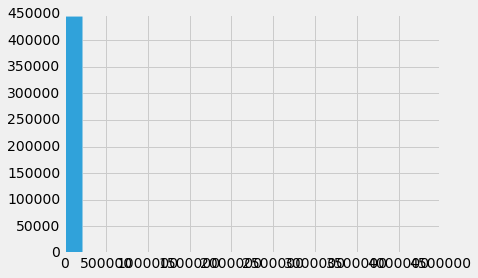

In [8]:
plt.style.use('fivethirtyeight')
plt.hist(df["Total_Amount_of_Payment_USDollars"], bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x11473fa90>],
 'caps': [<matplotlib.lines.Line2D at 0x11474e8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x114759bd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x114759590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1146d1f90>,
  <matplotlib.lines.Line2D at 0x11474e290>]}

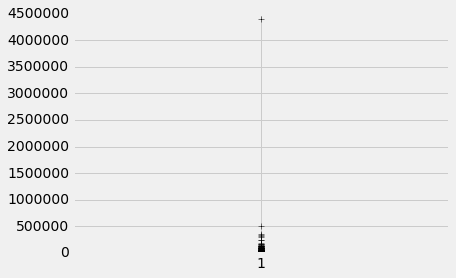

In [9]:
plt.boxplot(df["Total_Amount_of_Payment_USDollars"])

In [59]:
df[df['Name_of_Associated_Covered_Drug_or_Biological1'] == "Lazanda"].to_csv("2013data/LAZANDA.csv")

In [60]:
laz = pd.read_csv("2013data/LAZANDA.csv")

In [61]:
laz.pivot_table(index=['Physician_Profile_ID','Physician_First_Name','Physician_Last_Name'],values='Total_Amount_of_Payment_USDollars', aggfunc=sum).sort_values(ascending=False).head(10)


Physician_Profile_ID  Physician_First_Name  Physician_Last_Name
289705.0              ANITA                 GUPTA                  3749.56
219255.0              JEFFREY               GUDIN                  3521.64
21886.0               SAMYADEV              DATTA                    23.58
232826.0              YEKYUNG               KONG                     20.45
48505.0               STEPHEN               LEVINSON                 20.45
78767.0               ELINOR                ANAN                     20.45
150502.0              JOSEPH                VALENZA                  20.45
185391.0              BARBARA               BENEVENTO                20.45
194101.0              JEREMIAH              NIEVES                   20.45
198503.0              MONIFA                BROOKS                   20.45
Name: Total_Amount_of_Payment_USDollars, dtype: float64